

# Price Prediction Of Diamonds: Regression




![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [50]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score


%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Loading our data:

In [3]:
diamond = pd.read_csv('diamonds.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## The data at a glance:

In [4]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamond.shape

(53940, 10)

In [6]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [35]:
s = (diamond.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Numerical analysis and visualization

We'll analyze the `Unit_Cost` column:

In [8]:
diamond['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [9]:
diamond['price'].mean()

3932.799721913237

In [10]:
diamond['price'].median()

2401.0

In [11]:
diamond['price'].std()

3989.439738146379

<Axes: >

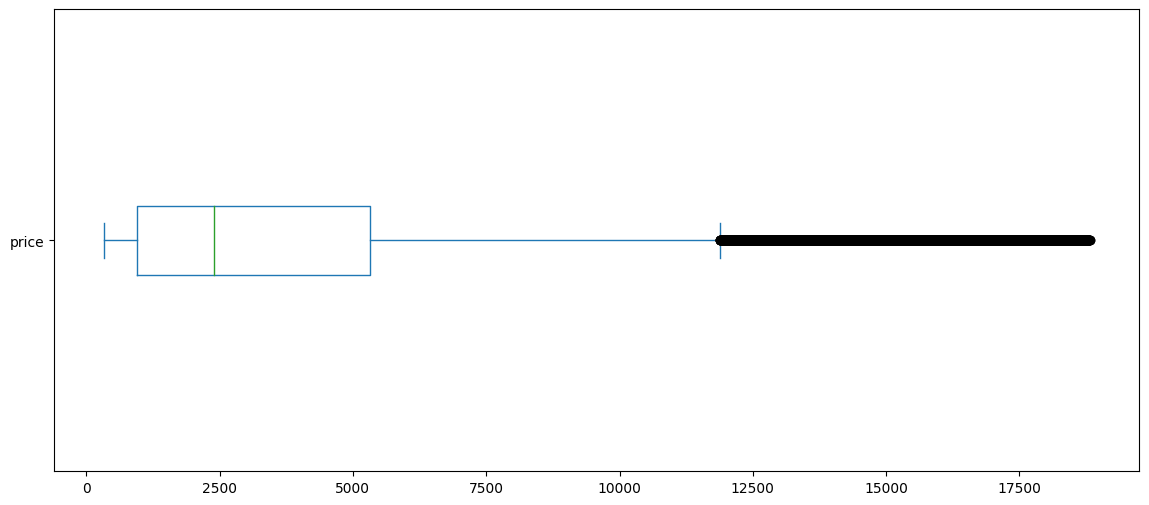

In [12]:
diamond['price'].plot(kind='box', vert=False, figsize=(14,6))

In [13]:
diamond = diamond[diamond['price'] <= 12500]

<Axes: >

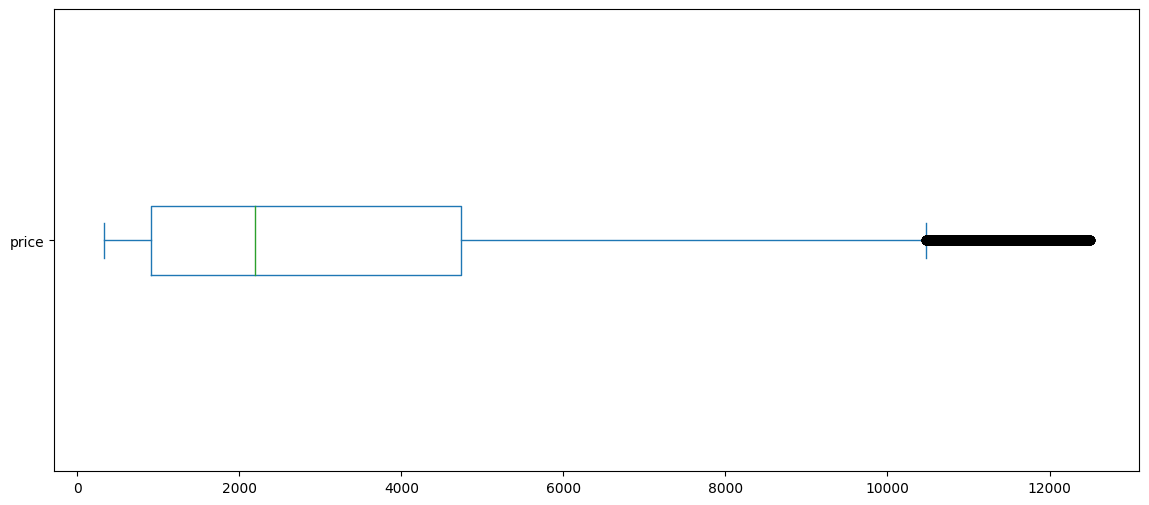

In [14]:
diamond['price'].plot(kind='box', vert=False, figsize=(14,6))

In [15]:
print(diamond['price'].mean())
print(diamond['price'].median())

3235.220595758077
2190.0


<Axes: ylabel='Density'>

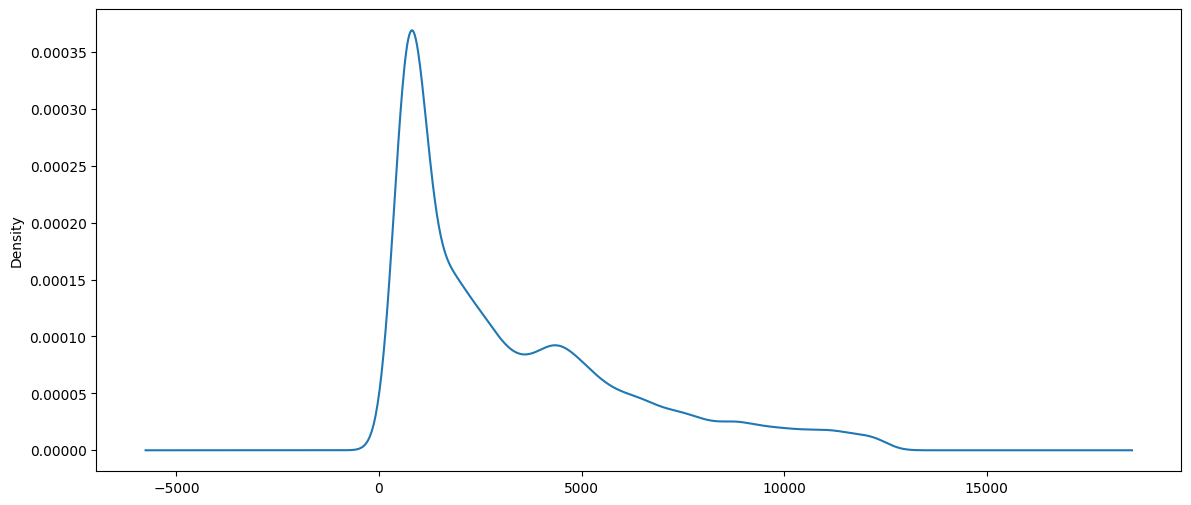

In [16]:
diamond['price'].plot(kind='density', figsize=(14,6)) # kde

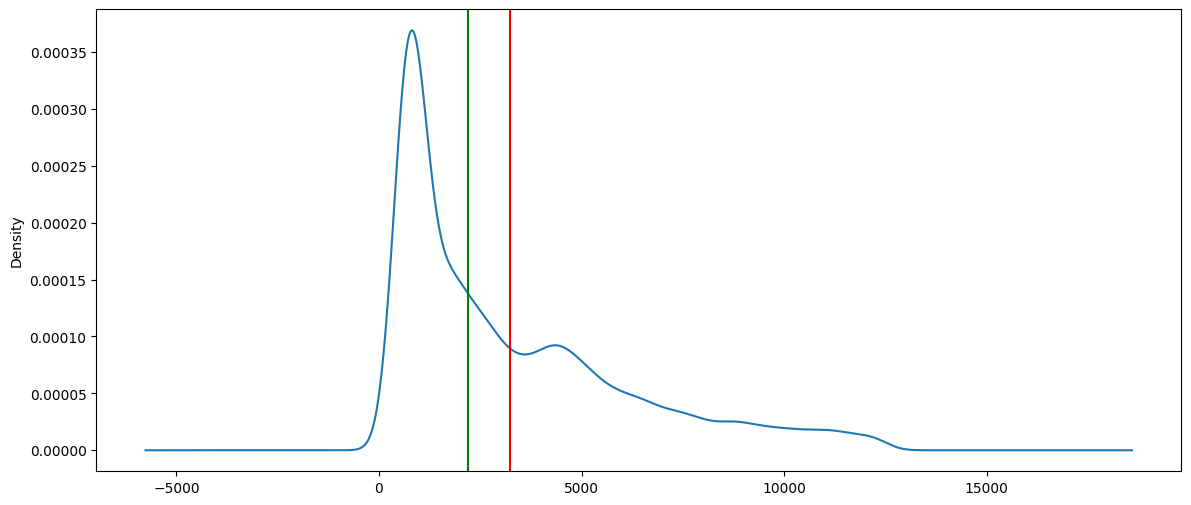

In [17]:
ax = diamond['price'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(diamond['price'].mean(), color='red')
ax.axvline(diamond['price'].median(), color='green')

# Standra


In [30]:
np.random.seed(1)
df2 = pd.DataFrame({
            'x1':np.random.normal(0, 10, 10000),
            'x2':np.random.normal(10, 20, 10000),
            'x3':np.random.normal(-10, 10, 10000)
})

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_df2 = ss.fit_transform(df2)
scaled_df2 = pd.DataFrame(scaled_df2, columns = ['x1', 'x2', 'x3'])

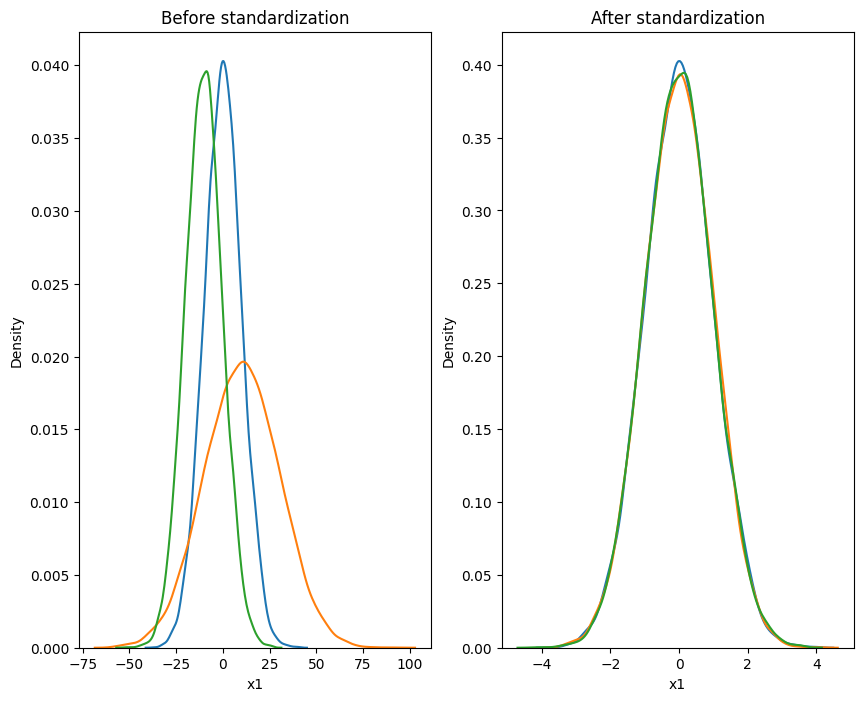

In [32]:
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))

ax1.set_title('Before standardization')
sns.kdeplot(df2['x1'], ax=ax1)
sns.kdeplot(df2['x2'], ax=ax1)
sns.kdeplot(df2['x3'], ax=ax1)

ax2.set_title('After standardization')
sns.kdeplot(scaled_df2['x1'], ax=ax2)
sns.kdeplot(scaled_df2['x2'], ax=ax2)
sns.kdeplot(scaled_df2['x3'], ax=ax2)

plt.show()

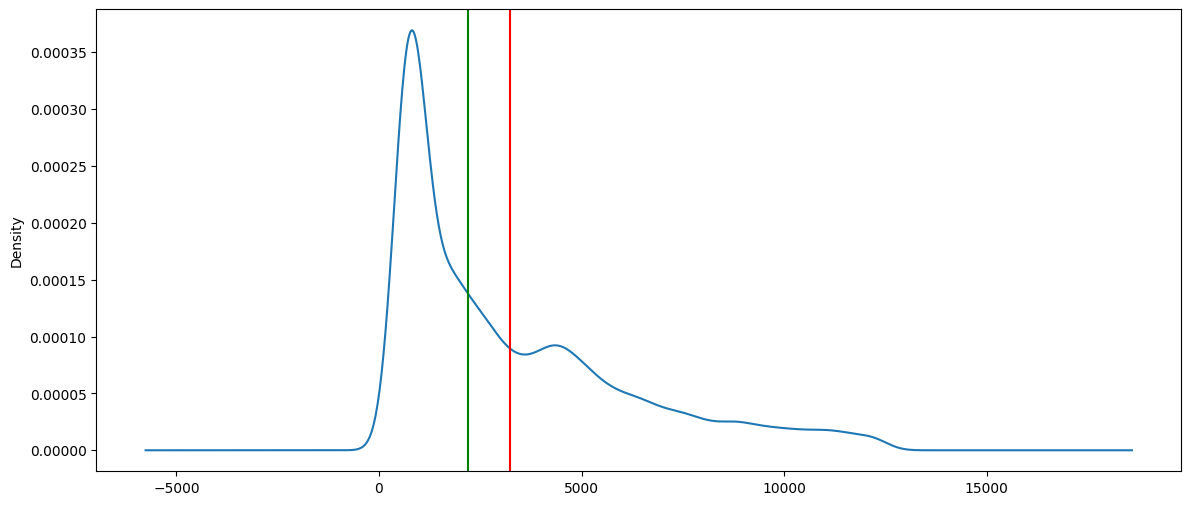

In [51]:
ax = diamond['price'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(diamond['price'].mean(), color='red')
ax.axvline(diamond['price'].median(), color='green')

Text(0.5, 0, 'dollars')

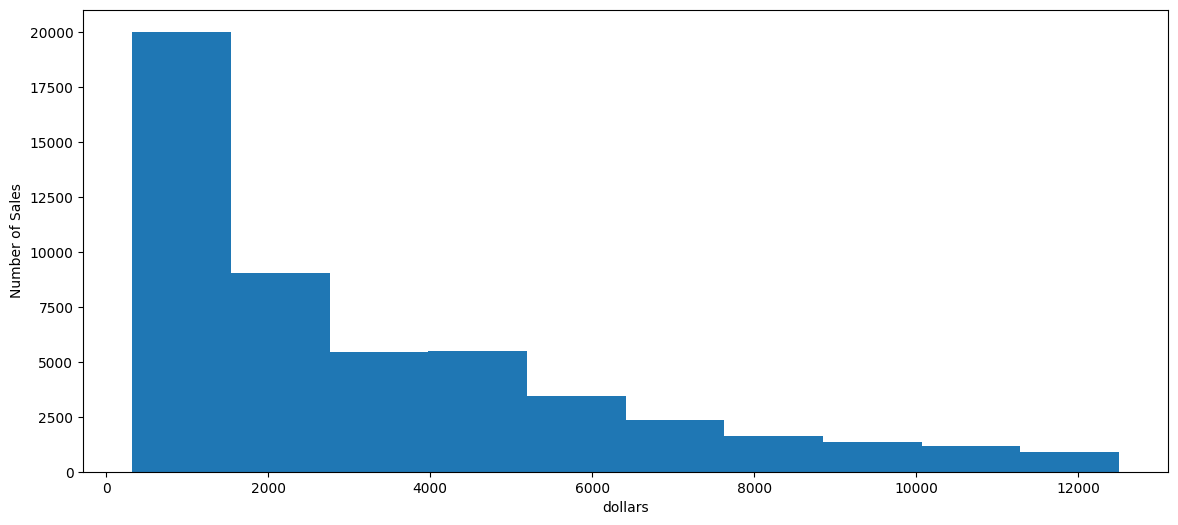

In [18]:
ax = diamond['price'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Categorical analysis and visualization

We'll analyze the `cut` column:

In [19]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [20]:
diamond['cut'].value_counts()

cut
Ideal        20550
Premium      12673
Very Good    11422
Good          4664
Fair          1517
Name: count, dtype: int64

<Axes: ylabel='count'>

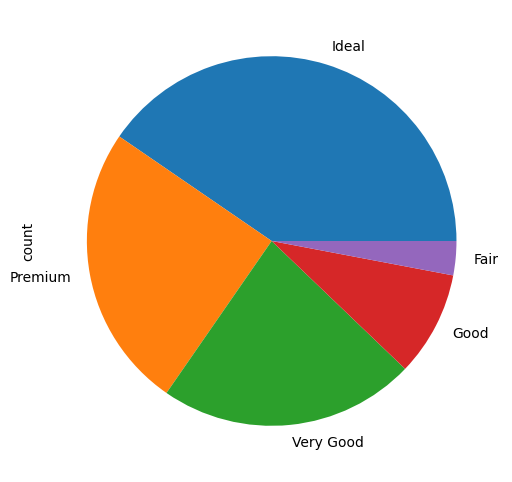

In [21]:
diamond['cut'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Number of Diamonds')

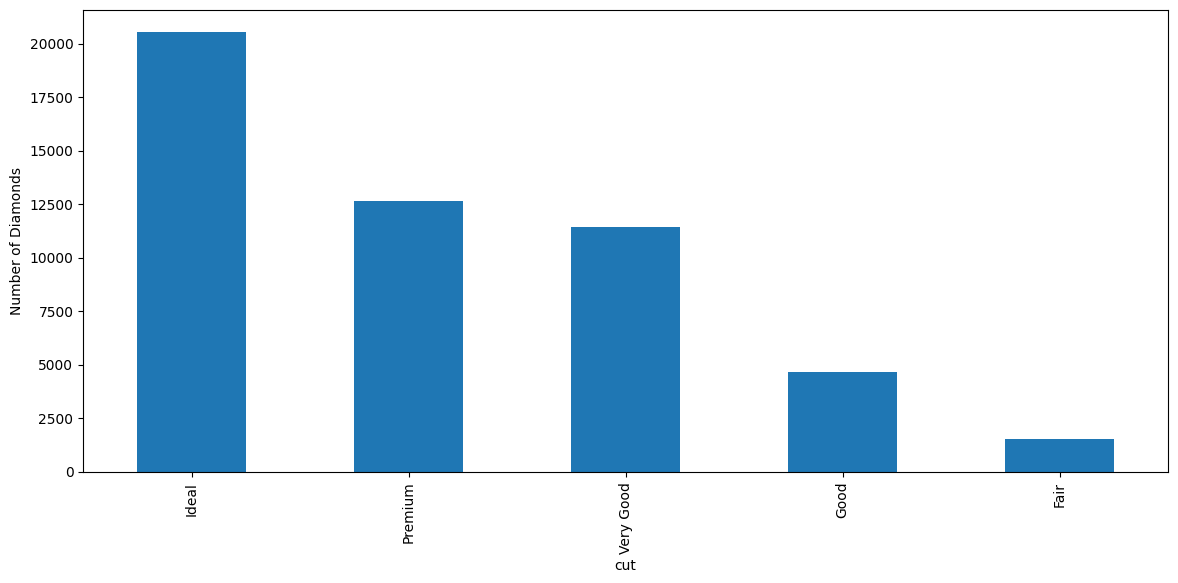

In [22]:
ax = diamond['cut'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Diamonds')

<Axes: xlabel='carat', ylabel='price'>

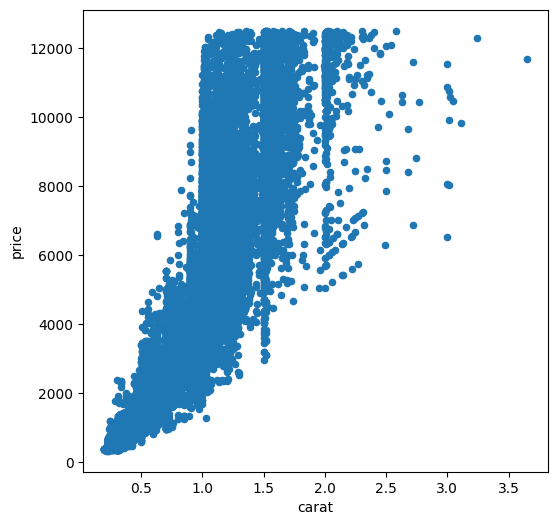

In [23]:
diamond.plot(kind='scatter', x='carat', y='price', figsize=(6,6))

In [24]:
diamond = diamond[diamond['carat'] < 3.0]

<Axes: xlabel='carat', ylabel='price'>

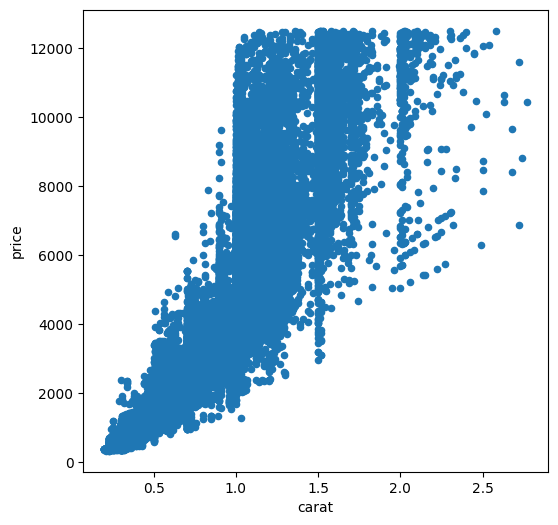

In [25]:
diamond.plot(kind='scatter', x='carat', y='price', figsize=(6,6))

Text(0, 0.5, 'Profit')

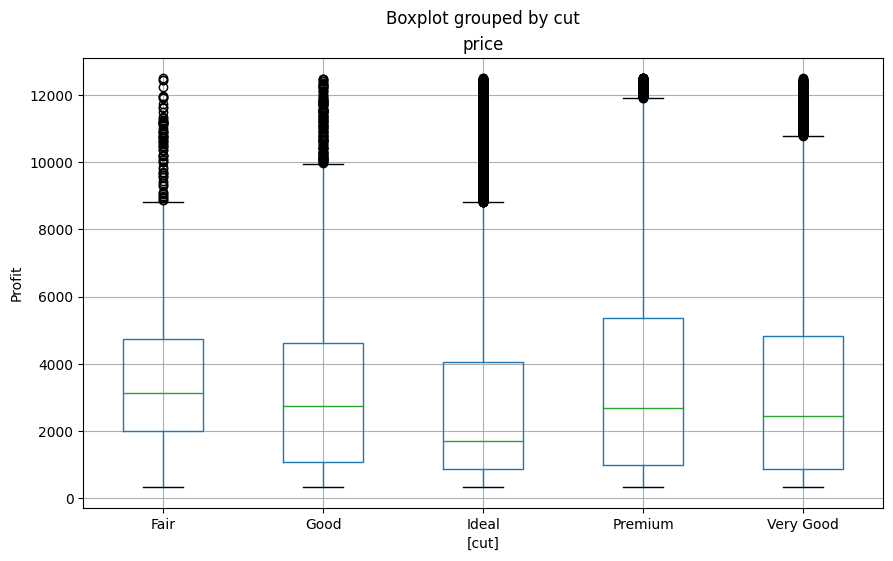

In [26]:
ax = diamond[['price', 'cut']].boxplot(by='cut', figsize=(10,6))
ax.set_ylabel('Profit')

carat       Axes(0.125,0.53;0.227941x0.35)
price    Axes(0.398529,0.53;0.227941x0.35)
dtype: object

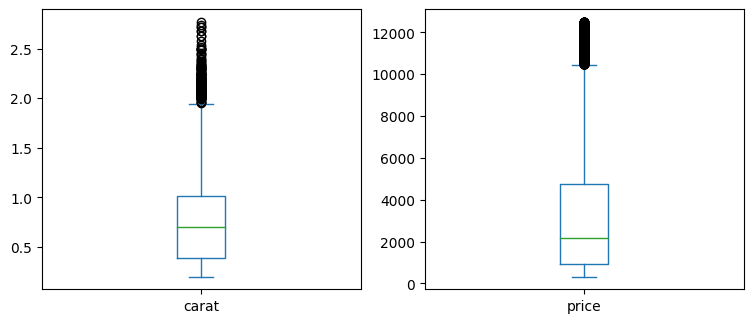

In [27]:
boxplot_cols = ['carat', 'price']

diamond[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

In [ ]:
#Dropping the outliers. 
diamond = diamond[(diamond["depth"]<75)&(diamond["depth"]>45)]
diamond = diamond[(diamond["table"]<80)&(diamond["table"]>40)]
diamond = diamond[(diamond["x"]<30)]
diamond = diamond[(diamond["y"]<30)]
diamond = diamond[(diamond["z"]<30)&(diamond["z"]>2)]

## Dropping dimentionless diamonds

In [29]:
diamond = diamond.drop(diamond[diamond["x"]==0].index)
diamond = diamond.drop(diamond[diamond["y"]==0].index)
diamond = diamond.drop(diamond[diamond["z"]==0].index)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Create the model

In [36]:
label_data = diamond.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [40]:
# Assigning the featurs as X and target as y
featurs = label_data.drop(["price"],axis =1)
target = label_data["price"]

featurs_train, featurs_test, target_train, target_test = train_test_split(featurs, target, test_size=0.30, random_state=7)

In [42]:
featurs.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75


In [43]:
target.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [45]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(featurs_train, target_train)
    # Predict the targets


In [47]:
cv_results_rms = []
    
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, featurs_train,target_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1107.198032 
DecisionTree: -538.618426 
RandomForest: -393.284970 
KNeighbors: -584.275016 
XGBRegressor: -389.670781 


In [48]:
pred = pipeline_rf.predict(featurs_test)

In [54]:
# Model Evaluation
print("R^2:",metrics.r2_score(target_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(target_test, pred))*(len(target_test)-1)/(len(target_test)-featurs_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(target_test, pred))
print("MSE:",metrics.mean_squared_error(target_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(target_test, pred)))

R^2: 0.9818024964859867
Adjusted R^2: 0.9817917435786513
MAE: 210.71545003608688
MSE: 149073.56103306962
RMSE: 386.10045458801216
